In [5]:
import pandas as pd
import random
import numpy as np
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt

In [6]:
# df = pd.read_csv('final0.csv')
# df = pd.read_csv('output.csv')
df = pd.read_excel('02_dataset.xlsx', engine='openpyxl')
df

,id,sentence,subject_entity,object_entity,label
0,0.0,"인스타그램은 계정 추천에서 COVID-19 계정을 제거할 것이며, 신뢰할 수 있는 ...","{'word': 'COVID-19', 'start_idx': 15, 'end_idx...","{'word': '인스타그램', 'start_idx': 0, 'end_idx': 4...",no_relation
1,1.0,"사용자는 이전에 지오태깅된 사용자의 지도 사진을 볼 수 있었는데, 이 기능은 낮은 ...","{'word': '지도', 'start_idx': 20, 'end_idx': 21,...","{'word': '2016년 9월', 'start_idx': 55, 'end_idx...",no_relation
2,2.0,이 기능은 2017년 4월에 사용자가 저장된 게시물로 컬렉션을 구성할 수 있도록 업...,"{'word': '컬렉션', 'start_idx': 30, 'end_idx': 32...","{'word': '2017년 4월', 'start_idx': 6, 'end_idx'...",no_relation
3,3.0,"2013년 10월, 인스타그램은 비디오와 이미지 광고가 미국의 사용자들을 위한 피드...","{'word': '이미지 광고', 'start_idx': 84, 'end_idx':...","{'word': '2013년 10월', 'start_idx': 0, 'end_idx...",no_relation
4,4.0,비디오 광고는 거의 1년 후인 2014년 10월 30일에 이어졌다.,"{'word': '비디오 광고', 'start_idx': 0, 'end_idx': ...","{'word': '2014년 10월 30일', 'start_idx': 17, 'en...",no_relation
...,...,...,...,...,...
865,865.0,그 영향을 받아 잡스는 동네의 어른들에게 여러 질문을 하며 엔지니어링에 대한 흥미를...,"{'word': '엔지니어링', 'start_idx': 33, 'end_idx': ...","{'word': '잡스', 'start_idx': 9, 'end_idx': 10, ...",no_relation
866,866.0,잡스는 초등학교 시절 학교를 자주 빼 먹는 비행 청소년이자 사고뭉치였다.,"{'word': '비행 청소년', 'start_idx': 24, 'end_idx':...","{'word': '잡스', 'start_idx': 0, 'end_idx': 1, '...",no_relation
867,867.0,잡스는 몬타로마 초등학교에서 친한 친구 릭 페렌티노와 함께 여러 가지 말썽을 피웠다.,"{'word': '몬타로마 초등학교', 'start_idx': 4, 'end_idx...","{'word': '릭 페렌티노', 'start_idx': 22, 'end_idx':...",no_relation
868,868.0,이와 같은 잡스의 업적과 영향력 때문에 그를 추종하는 사람들이 나오기도 하였다. 일...,"{'word': '예수', 'start_idx': 55, 'end_idx': 56,...","{'word': '잡스', 'start_idx': 6, 'end_idx': 7, '...",no_relation


# 분포 확인

In [3]:
df['label'].value_counts()/870*100

no_relation                           36.436782
inv : function                         6.781609
vis : property                         6.781609
inv : release_date/production_date     5.977011
org : produce                          5.632184
org : employees                        5.402299
vis : release_date/production_date     5.172414
vis : component                        4.712644
inv : alternative_names                4.022989
inv : property                         3.333333
inv : foundation_technique             3.218391
inv : component                        3.218391
vis : function                         3.218391
vis : alternative_names                1.954023
vis : foundation_technique             1.839080
inv : nou                              1.379310
vis : specification                    0.919540
Name: label, dtype: float64

In [4]:
df['label'].unique()

array(['no_relation', 'vis : specification', 'inv : property',
       'org : produce', 'org : employees', 'inv : rdpd', 'inv : nou',
       'inv : an', 'vis : ft', 'inv : ft', 'vis : comp', 'inv : comp',
       'vis : func', 'inv : func', 'vis : property', 'vis : rdpd',
       'vis : an'], dtype=object)

# 100개 선택

In [100]:
random.seed(105)
n = 100 # 뽑을 개수

idx = sorted(random.sample(range(df.shape[0]), n))
df_kappa = df.iloc[idx,]
df_kappa

,id,sentence,subject_entity,object_entity,label
2,2,이 기능은 2017년 4월에 사용자가 저장된 게시물로 컬렉션을 구성할 수 있도록 업...,"{'word': '컬렉션', 'start': 4928, 'end': 4930, 't...","{'word': '2017년 4월', 'start': 4904, 'end': 491...",no_relation
14,14,"8월, 인스타그램은 사용자들이 댓글로 더 쉽게 상호작용할 수 있도록 댓글을 스레드 ...","{'word': '댓글', 'start': 5140, 'end': 5141, 'ty...","{'word': '스레드 형태', 'start': 5144, 'end': 5149,...",inv : property
33,33,인스타그램이 특화 기능을 갖춘 독립형 어플 3개를 개발해 출시했다.,"{'word': '인스타그램', 'start': 11441, 'end': 11445...","{'word': '독립형 어플', 'start': 11458, 'end': 1146...",org : produce
58,58,인스타그램은 2018년 4월 선택 시 피사체의 초점을 맞추면서 사진이나 영상의 배경...,"{'word': ""'포커스 모드' 버전"", 'start': 5380, 'end': ...","{'word': '2018년 4월', 'start': 5319, 'end': 532...",inv : rdpd
62,62,2021년 3월에는 새로운 어린이 안전 정책의 일환으로 성인들이 팔로우를 하지 않는...,{'word': '성인들이 팔로우를 하지 않는 18세 이하 사용자들에게 메시지를 보...,"{'word': '2021년 3월', 'start': 8541, 'end': 854...",inv : rdpd
...,...,...,...,...,...
810,810,잡스는 언론에 보도된 것 보다는 건강한 모습을 보여 경영에 문제가 없음을 과시했으나...,"{'word': '애플', 'start': 7999, 'end': 8000, 'ty...","{'word': '잡스', 'start': 7924, 'end': 7925, 'ty...",no_relation
820,820,대학 진학을 결정해야 될 시기가 되자 잡스는 잡스 부부에게 대학교에 진학하지 않겠다...,"{'word': '대학', 'start': 3499, 'end': 3500, 'ty...","{'word': '17년', 'start': 3475, 'end': 3477, 't...",no_relation
825,825,애플은 당시 싱귤러 와이어리스(Cingular Wireless→AT&amp;T 모빌...,"{'word': '싱귤러 와이어리스', 'start': 9947, 'end': 99...","{'word': '30개월', 'start': 10027, 'end': 10030,...",no_relation
829,829,"애플은 고객, 판매자, 은행 사이에 머무르는 사용량을 추적하지 않을 것이라고 덧붙였다.","{'word': '은행', 'start': 17327, 'end': 17328, '...","{'word': '사용량', 'start': 17339, 'end': 17341, ...",no_relation


In [101]:
sub = list(map(eval, df_kappa['subject_entity']))
obj = list(map(eval, df_kappa['object_entity']))

s = []; o = []
for i in range(len(sub)):
    s.append(sub[i]['word'] + '/' + sub[i]['type'])
    o.append(obj[i]['word'] + '/' + obj[i]['type'])

s = pd.DataFrame(s)
o = pd.DataFrame(o)

tmp = df_kappa.drop(labels = ["subject_entity", "object_entity"], axis = 1).reset_index(drop=True)
df_kappa0 = pd.concat([tmp, s, o], axis = 1)
df_kappa0.columns = ['id', 'sentence', 'label', "subject_entity", "object_entity"]
df_kappa0 = df_kappa0[['id', 'sentence',"subject_entity", "object_entity" ,'label']]

In [102]:
df_kappa0.to_csv('for_kappa.csv', encoding="utf-8-sig", index=False)

In [103]:
df_kappa0['label'].value_counts()

no_relation            31
vis : property         13
inv : rdpd              9
org : produce           6
inv : func              6
vis : func              6
vis : rdpd              5
inv : nou               4
inv : comp              3
org : employees         3
inv : ft                3
vis : comp              3
vis : an                3
inv : property          2
vis : specification     1
inv : an                1
vis : ft                1
Name: label, dtype: int64

# Data Split

In [5]:
X = np.array(df.drop(labels = 'label', axis=1))
y = np.array(df.loc[:,'label'])

In [6]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 4000) # 비율 조정 5 -> 8:2
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):    # 여기서 마지막 index를 사용한 것. 1~4번째는 불필요하긴 함
    print("TRAIN :", train_index, "TEST:", test_index)
    print("***** Length ***** :",len(train_index), len(test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN : [  0   1   3   4   5   6   7   8   9  10  11  12  13  15  16  17  18  20
  21  23  24  26  27  28  30  32  33  34  35  36  37  38  39  41  42  43
  44  45  46  47  48  49  50  51  52  53  54  56  57  58  59  61  62  63
  65  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  83  84
  85  86  87  88  89  90  93  94  95  99 101 102 103 104 105 107 108 111
 112 113 114 116 117 119 120 121 122 123 124 125 126 127 128 131 132 133
 136 138 139 141 142 144 145 146 147 148 149 150 151 152 153 154 155 156
 159 160 161 162 165 166 167 168 169 170 171 172 173 174 177 180 182 183
 184 185 186 188 189 190 191 192 193 194 195 196 197 198 199 201 202 203
 204 205 206 207 209 210 211 212 213 214 215 216 217 218 219 221 222 223
 224 225 226 227 228 229 230 232 233 234 235 237 240 241 242 243 244 245
 246 249 250 251 253 254 255 256 257 258 259 260 262 263 264 266 267 268
 269 270 271 272 273 274 276 277 278 280 281 282 283 284 285 286 288 289
 291 293 294 295 297 299 300 301 302 303 30

In [7]:
df_train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
df_test = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], axis=1)
df_train.columns = df.columns[[0,1,2,3,4]]
df_test.columns = df.columns[[0,1,2,3,4]]
df_train.head()

,id,sentence,subject_entity,object_entity,label
0,0,"인스타그램은 계정 추천에서 COVID-19 계정을 제거할 것이며, 신뢰할 수 있는 ...","{'word': 'COVID-19', 'start_idx': 15, 'end_idx...","{'word': '인스타그램', 'start_idx': 0, 'end_idx': 4...",no_relation
1,2,이 기능은 2017년 4월에 사용자가 저장된 게시물로 컬렉션을 구성할 수 있도록 업...,"{'word': '컬렉션', 'start_idx': 30, 'end_idx': 32...","{'word': '2017년 4월', 'start_idx': 6, 'end_idx'...",no_relation
2,3,"2013년 10월, 인스타그램은 비디오와 이미지 광고가 미국의 사용자들을 위한 피드...","{'word': '이미지 광고', 'start_idx': 84, 'end_idx':...","{'word': '2013년 10월', 'start_idx': 0, 'end_idx...",no_relation
3,4,비디오 광고는 거의 1년 후인 2014년 10월 30일에 이어졌다.,"{'word': '비디오 광고', 'start_idx': 0, 'end_idx': ...","{'word': '2014년 10월 30일', 'start_idx': 17, 'en...",no_relation
4,5,"또한, 한 줄의 사진들은 모바일 레이아웃에 맞춰 5장의 사진이 아닌 3장의 사진을 ...","{'word': '사진', 'start_idx': 9, 'end_idx': 10, ...","{'word': '5장', 'start_idx': 27, 'end_idx': 28,...",no_relation


In [8]:
df_train.to_csv('train_new.csv', encoding="utf-8-sig", index=False)
df_test.to_csv('test_new.csv', encoding="utf-8-sig", index=False)

# pkl 파일 만들기

In [11]:
a = {'no_relation':0,
 'org : produce':1,
 'org : employees':2,
 'vis : rdpd':3,
 'inv : rdpd':4,
 'inv : nou':5,
 'vis : an':6,
 'inv : an':7,
 'vis : ft':8, 
 'inv : ft':9,
 'vis : comp':10,
 'inv : comp':11,
 'vis : func':12,
 'inv : func':13,
 'vis : specification':14,
 'vis : property':15,
 'inv : property':16}
type(a)

dict

# label 종류 시각화

In [75]:
df['label'].value_counts()

no_relation                           317
inv : function                         59
vis : property                         59
inv : release_date/production_date     52
org : produce                          49
org : employees                        47
vis : release_date/production_date     45
vis : component                        41
inv : alternative_names                35
inv : property                         29
inv : foundation_technique             28
inv : component                        28
vis : function                         28
vis : alternative_names                17
vis : foundation_technique             16
inv : nou                              12
vis : specification                     8
Name: label, dtype: int64

In [76]:
list(df['label'].value_counts().index)

['no_relation',
 'inv : function',
 'vis : property',
 'inv : release_date/production_date',
 'org : produce',
 'org : employees',
 'vis : release_date/production_date',
 'vis : component',
 'inv : alternative_names',
 'inv : property',
 'inv : foundation_technique',
 'inv : component',
 'vis : function',
 'vis : alternative_names',
 'vis : foundation_technique',
 'inv : nou',
 'vis : specification']

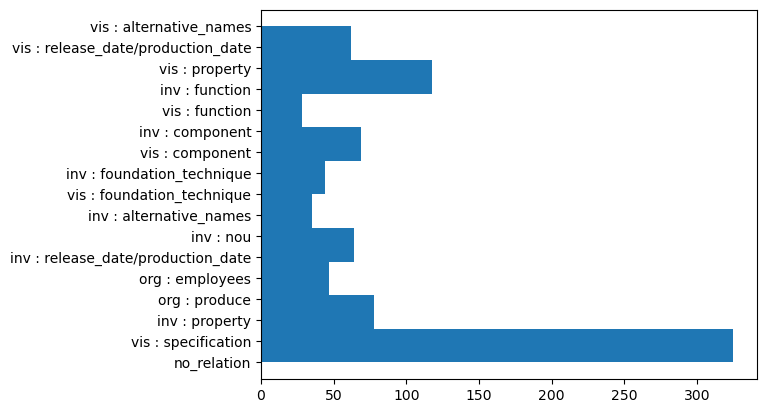

In [77]:
x = df['label']

plt.hist(x, orientation='horizontal')
plt.show()

<AxesSubplot:>

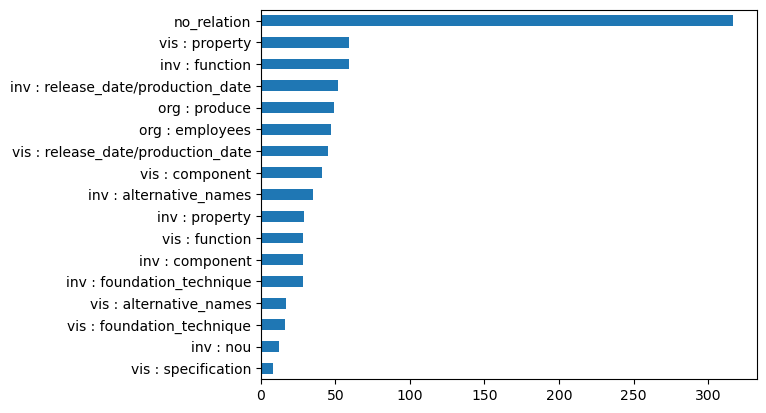

In [78]:
x = df['label'].value_counts(ascending = True)

x.plot(kind='barh')
# plt.show()

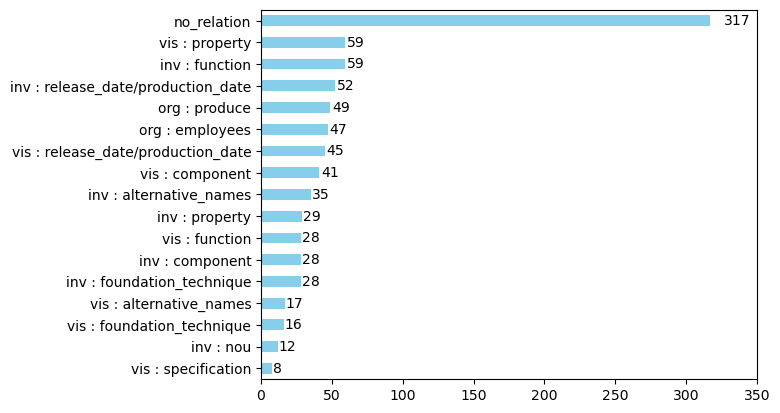

In [99]:
ax = x.plot(kind='barh', rot = 0, xlim = [0, 350], color = 'skyblue')
for p in ax.patches:
    xx, y, width, height = p.get_bbox().bounds
    ax.text(width*1.03, y+height/2, int(width), va='center')